### Requests 사용법

In [77]:
# 서버에 페이지 정보를 요청할 때 쓰는 라이브러리
import requests as req

In [78]:
url = 'https://www.naver.com/'
res=req.get(url) # response의 약자

In [79]:
res
# <Response [200]> = 데이터가 잘 넘어왔어요

<Response [200]>

'\n<!doctype html>                 <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한
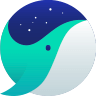
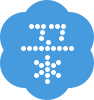

In [80]:
# 응답받은 페이지 정보 보기
res.text

#### 네이버 페이지에서 블로그라는 글자 가져오기

##### BeautifulSoup 사용하기
- 가져온 데이터에서 내가 원하는 내용만 추출할 때 사용

In [81]:
from bs4 import BeautifulSoup as bs

In [82]:
# bs(어떤걸 가공할 것인가, 어떻게 가공할 것인가 - 파싱방법)
soup = bs(res.text, 'lxml') # 여러 파싱방법이 있지만 lxml 방식이 빠르고 데이터 처리 속도가 빠름

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
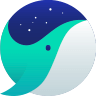
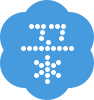

In [83]:
soup

In [84]:
# find_all = 특정 데이터를 모두 찾아오는 기능 (태그이름, 클래스 이름 / 아이디)
result =soup.find_all("a", class_='nav') #아이디는 그냥 id적으면 됨

In [85]:
result2 = soup.select('li>.nav')

In [86]:
result2

[<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>,
 <a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a>,
 <a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a>,
 <a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a>,
 <a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a>,
 <a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a>,
 <a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a>,
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>,
 <a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a>,
 <a class="nav" data-clk="svc.news" href="https://news.naver.com/">뉴스</a>,
 <a class="nav" data-clk="svc.stock" href="https://finance.naver.com/">증권</a>,


In [87]:
result2[2].text

'블로그'

In [88]:
result[2].text

'블로그'

#### 실습

In [89]:
s_url = "https://sports.news.naver.com/index.nhn"
res1=req.get(s_url)

In [90]:
res1

<Response [200]>

In [91]:
soup1 = bs(res1.text, 'lxml') 

In [92]:
result3= soup1.select('strong.title') #스트롱 태그이면서 클래스 이름이 타이틀인것

In [93]:
result3

[<strong class="title">진짜 만화인가? 오타니, 7이닝 10탈삼진 후 우익수 변신</strong>,
 <strong class="title">구단의 마지막 설득에도…허문회 감독은 완강했다</strong>,
 <strong class="title">"죄송할 뿐 입니다","미안해 마라. 넌 우리 톱 타자다"</strong>,
 <strong class="title">"빅클럽들 손흥민 왜 안찾지? 놀라운 일" 英매체도 의아</strong>,
 <strong class="title">200억 연봉삭감에 동의한 이니에스타 "비셀 고베에 진심 느꼈다"</strong>,
 <strong class="title">[피치 피플] 여전히 뜨겁게 한국을 추억하는 ‘바람의 아들’ 마니치</strong>,
 <strong class="title">공지</strong>]

In [94]:
for i in range(len(result3)):
    print (result3[i].text)

진짜 만화인가? 오타니, 7이닝 10탈삼진 후 우익수 변신
구단의 마지막 설득에도…허문회 감독은 완강했다
"죄송할 뿐 입니다","미안해 마라. 넌 우리 톱 타자다"
"빅클럽들 손흥민 왜 안찾지? 놀라운 일" 英매체도 의아
200억 연봉삭감에 동의한 이니에스타 "비셀 고베에 진심 느꼈다"
[피치 피플] 여전히 뜨겁게 한국을 추억하는 ‘바람의 아들’ 마니치
공지


In [95]:
for i in result3:
    print(i.text)

진짜 만화인가? 오타니, 7이닝 10탈삼진 후 우익수 변신
구단의 마지막 설득에도…허문회 감독은 완강했다
"죄송할 뿐 입니다","미안해 마라. 넌 우리 톱 타자다"
"빅클럽들 손흥민 왜 안찾지? 놀라운 일" 英매체도 의아
200억 연봉삭감에 동의한 이니에스타 "비셀 고베에 진심 느꼈다"
[피치 피플] 여전히 뜨겁게 한국을 추억하는 ‘바람의 아들’ 마니치
공지


In [96]:
result3[0].text

'진짜 만화인가? 오타니, 7이닝 10탈삼진 후 우익수 변신'

### Melon 페이지 정보 가져오기

In [97]:
m_url= "https://www.melon.com/"
res=req.get(m_url)

In [98]:
res #406 = 요청거부

<Response [406]>

In [99]:
# 컴퓨터가 아닌 사람으로 속이는 작업
h = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36"}

In [100]:
res=req.get(m_url, headers = h)

In [101]:
res

<Response [200]>

In [102]:
res.text

'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>Melon::음악이 필요한 순간, 멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="e2b43191afa0f1d2deb8e2cda8f45ee1408c44a1"/>\r\n\t<meta property="fb:app_id" content="357952407588971"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png"/>\r\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론"/>\r\n\t<meta property="og:url" content="http://www.melon.com/"/>\r\n\t<meta pro

#### 멜론차트에서 곡명 가져오기

In [103]:
c_url= "https://www.melon.com/chart/index.htm"
res1= req.get(c_url, headers = h)
    

In [104]:
res1

<Response [200]>

In [120]:
a= bs(res1.text, 'lxml')

In [121]:
a

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;24H&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="e2b43191afa0f1d2deb8e2cda8f45ee1408c44a1" name="naver-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="width=device-width" name="viewport"/>
<link href="/favicon.ico?2" id="favicon" rel="shortc

In [123]:
title= a.select('div.ellipsis.rank01')

In [157]:
for i in title:
    print(i.text)


롤린 (Rollin')


Peaches (Feat. Daniel Caesar & Giveon)


라일락


운전만해 (We Ride)


Celebrity


Timeless


라라라


내사람


Dynamite


내 손을 잡아


Coin


LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지)


마.피.아. In the morning


밝게 빛나는 별이 되어 비춰줄게


On The Ground


Dun Dun Dance


밤하늘의 별을(2020)


멜로디


사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco)


잠이 오질 않네요


그냥 안아달란 말야


살다가


Blueming


취기를 빌려 (취향저격 그녀 X 산들)


에잇(Prod.&Feat. SUGA of BTS)


어푸 (Ah puh)


Lovesick Girls


VVS (Feat. JUSTHIS) (Prod. GroovyRoom)


나랑 같이 걸을래 (바른연애 길잡이 X 적재)


흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야


12:45 (Stripped)


ASAP


어떻게 이별까지 사랑하겠어, 널 사랑하는 거지


그날에 나는 맘이 편했을까


이 밤을 빌려 말해요 (바른연애 길잡이 X 10CM)


추억은 만남보다 이별에 남아


상상더하기


Savage Love (Laxed - Siren Beat) (BTS Remix)


오래된 노래


Dolphin


맛 (Hot Sauce)


METEOR


2002


모든 날, 모든 순간 (Every day, Every Moment)


힘든 건 사랑이 아니다


봄 안녕 봄


너의 발걸음에 빛을 비춰줄게 (Prod. 조영수)


아로하


아이와 나의 바다


너의 번호를 누르고 (Prod. 영화처럼)


사실 나는 (Feat.전건호)


어떻게 지내 (Prod. By VAN.C)


Life Goes On


작은 것들을 위한 시 (Boy With L

#### 멜론차트에서 가수명만 가져오기

In [141]:
artist= a.select('div.rank02>a:nth-child(1)')

In [142]:
for i in artist:
    print(i.text)

브레이브걸스
Justin Bieber
아이유
브레이브걸스
아이유
SG 워너비
SG 워너비
SG 워너비
방탄소년단
아이유
아이유
양요섭
ITZY (있지)
송이한
로제 (ROSÉ)
오마이걸 (OH MY GIRL)
경서
ASH ISLAND
호미들
장범준
다비치
SG 워너비
아이유
산들
아이유
아이유
BLACKPINK
미란이 (Mirani)
적재
장범준
Etham
STAYC(스테이씨)
AKMU (악동뮤지션)
이예준
10CM
정동하
라붐 (LABOUM)
Jawsh 685
스탠딩 에그
오마이걸 (OH MY GIRL)
NCT DREAM
창모 (CHANGMO)
Anne-Marie
폴킴
임창정
아이유
케이시 (Kassy)
조정석
아이유
#안녕
경서예지
오반 (OVAN)
방탄소년단
방탄소년단
마크툽 (MAKTUB)
방탄소년단
오마이걸 (OH MY GIRL)
노을
BLACKPINK
Maroon 5
CHEEZE (치즈)
하동균
아이유
아이유
임영웅
허각
Tones And I
규현 (KYUHYUN)
소정 (레이디스 코드)
박진영
SG 워너비
아이유
Justin Bieber
폴킴
아이유
가호 (Gaho)
Lauv
신예영
허각
벤
릴보이 (lIlBOI)
숀 (SHAUN)
NCT DREAM
Dua Lipa
하이라이트 (Highlight)
임창정
SG 워너비
백지영
순순희
로제 (ROSÉ)
폴킴
블루 (BLOO)
Conan Gray
아이유
마마무 (Mamamoo)
경서 (경서예지)
황인욱
전상근
황치열
화사 (Hwa Sa)


In [127]:
import numpy as np
import pandas as pd

####  데이터프레임 만들기

In [158]:
artist_list =[] # 빈리스트
title_list =[]
rank_list =[]

In [159]:
for i in range(len(artist)):
    artist_list.append(artist[i].text.strip())
    title_list.append(title[i].text.strip())
    rank_list.append(i+1)

In [160]:
print(len(artist_list))
print(len(title_list))
print(len(rank_list))

100
100
100


In [161]:
dic = {"rank":rank_list, "title": title_list, "artist": artist_list}

In [162]:
dic # 딕셔너리 형태

{'rank': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100],
 'title': ["롤린 (Rollin')",
  'Peaches (Feat. Daniel Caesar & Giveon)',
  '라일락',
  '운전만해 (We Ride)',
  'Celebrity',
  'Timeless',
  '라라라',
  '내사람',
  'Dynamite',
  '내 손을 잡아',
  'Coin',
  'LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지)',
  '마.피.아. In the morning',
  '밝게 빛나는 별이 되어 비춰줄게',
  'On The Ground',
  'Dun Dun Dance',
  '밤하늘의 별을(2020)',
  '멜로디',
  '사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco)',
  '잠이

In [163]:
melon = pd. DataFrame(dic)

In [164]:
melon

,rank,title,artist
0,1,롤린 (Rollin'),브레이브걸스
1,2,Peaches (Feat. Daniel Caesar & Giveon),Justin Bieber
2,3,라일락,아이유
3,4,운전만해 (We Ride),브레이브걸스
4,5,Celebrity,아이유
...,...,...,...
95,96,술 한잔 해요,경서 (경서예지)
96,97,응급실 (2021),황인욱
97,98,사랑은 지날수록 더욱 선명하게 남아,전상근
98,99,안녕이란 (Two Letters),황치열


In [165]:
melon.set_index('rank', inplace = True)

In [166]:
melon

,title,artist
rank,,
1,롤린 (Rollin'),브레이브걸스
2,Peaches (Feat. Daniel Caesar & Giveon),Justin Bieber
3,라일락,아이유
4,운전만해 (We Ride),브레이브걸스
5,Celebrity,아이유
...,...,...
96,술 한잔 해요,경서 (경서예지)
97,응급실 (2021),황인욱
98,사랑은 지날수록 더욱 선명하게 남아,전상근
